In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [2]:
CH1 = pd.read_csv("F0004CH1.csv", names = ['t', 'y']).values
CH2 = pd.read_csv("F0004CH3.csv", names = ['t', 'y']).values
CH3 = pd.read_csv("F0004CH4.csv", names = ['t', 'y']).values

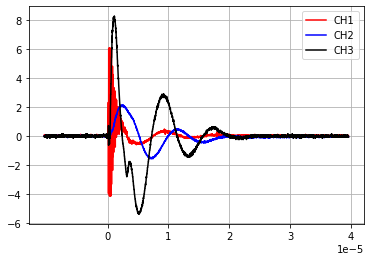

In [3]:
plt.plot(CH1[:, 0], CH1[:, 1], color = 'red', label = 'CH1')
plt.plot(CH2[:, 0], CH2[:, 1], color = 'blue', label = 'CH2')
plt.plot(CH3[:, 0], CH3[:, 1], color = 'black', label = 'CH3')
plt.xticks(np.linspace(0.0, 4.0e-5, 5))
plt.grid()
plt.legend()
plt.show()

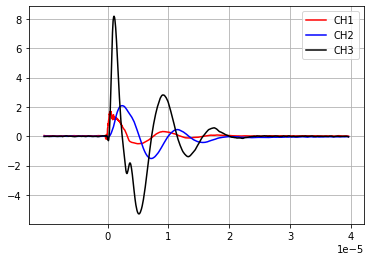

In [4]:
CH1[:, 1] = savgol_filter(CH1[:, 1], 51, 3)
CH2[:, 1] = savgol_filter(CH2[:, 1], 51, 3)
CH3[:, 1] = savgol_filter(CH3[:, 1], 51, 3)

plt.plot(CH1[:, 0], CH1[:, 1], color = 'red', label = 'CH1')
plt.plot(CH2[:, 0], CH2[:, 1], color = 'blue', label = 'CH2')
plt.plot(CH3[:, 0], CH3[:, 1], color = 'black', label = 'CH3')
plt.xticks(np.linspace(0.0, 4.0e-5, 5))
plt.grid()
plt.legend()
plt.show()

In [5]:
I_sens = 1 / 100 # чувствительность метода для тока В/кА
k_I = 10 # коэффициент делителя для тока
dI_sens = (4 * math.pi * 1e-7 * 1500 * math.pi * (2.5 * 1e-3)**2) / (2 * math.pi * 60 * 1e-3) # чувствительнось метода для производной тока В/(кА/с)
k_dI = 20 # коэффициент делителя для производной тока

In [6]:
t = CH1[CH1[:, 0] >= 0, 0]
U = CH1[CH1[:, 0] >= 0, 1] * 4500 # в В
I = CH2[CH2[:, 0] >= 0, 1] * k_I * 1000 / I_sens # в А
dI = CH3[CH3[:, 0] >= 0, 1] * k_dI * 1000/ dI_sens # в А/с
a = dI[0]

# **Графики** *U(t), I(t), dI(t)*
---



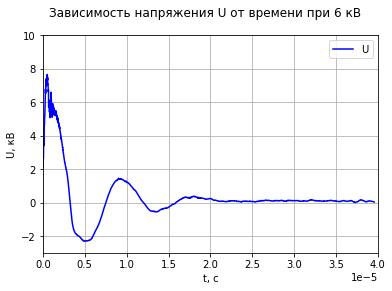

In [7]:
plt.plot(t, U / 1000, color = 'blue', label = 'U')
plt.xticks(np.linspace(0.0, 4.0e-5, 9))
plt.xlim([0, 4e-5])
plt.ylim([-3, 10])
plt.xlabel('t, c')
plt.ylabel('U, кВ')
plt.suptitle('Зависимость напряжения U от времени при 6 кВ')
plt.grid()
plt.legend()
plt.savefig('U(t)')
plt.show()

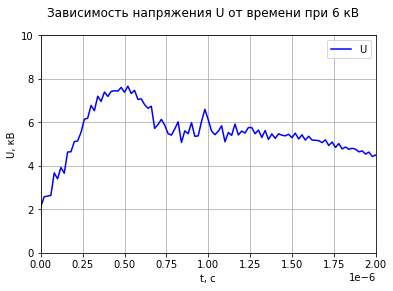

In [8]:
plt.plot(t, U / 1000, color = 'blue', label = 'U')
plt.xticks(np.linspace(0.0, 0.2e-5, 9))
plt.xlim([0, 0.2e-5])
plt.ylim([-0, 10])
plt.xlabel('t, c')
plt.ylabel('U, кВ')
plt.suptitle('Зависимость напряжения U от времени при 6 кВ')
plt.grid()
plt.legend()
plt.show()

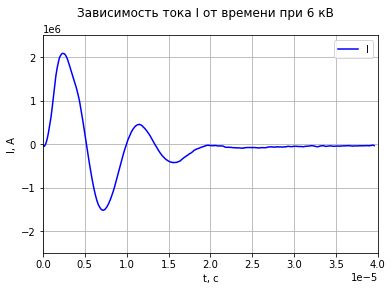

In [9]:
plt.plot(t, I, color = 'blue', label = 'I')
plt.xticks(np.linspace(0.0, 4.0e-5, 9))
plt.xlim([0, 4e-5])
plt.ylim([-0.25e7, 0.25e7])
plt.xlabel('t, c')
plt.ylabel('I, A')
plt.suptitle('Зависимость тока I от времени при 6 кВ')
plt.grid()
plt.legend()
plt.savefig('I(t)')
plt.show()

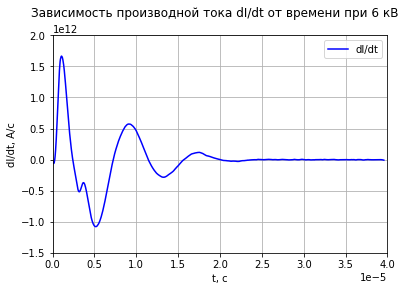

In [10]:
plt.plot(t, dI, color = 'blue', label = 'dI/dt')
plt.xticks(np.linspace(0.0, 4.0e-5, 9))
plt.xlim([0, 4e-5])
plt.ylim([-1.5e12, 2e12])
plt.xlabel('t, c')
plt.ylabel('dI/dt, A/c')
plt.suptitle('Зависимость производной тока dI/dt от времени при 6 кВ')
plt.grid()
plt.legend()
plt.savefig('dI(t)')
plt.show()

# **Графики** *Lp(t), Rp(t), d(t)*
---



In [11]:
t2 = 5e-6 # конец разряда в секундах
Lp0 = 2 * 4 * math.pi * 1e-7 * 230 * 1e-3 * math.log(74/25)

In [12]:
Lp = np.array([0])
Rp = np.array([0])
k = 35
t1 = t[k]
U = np.delete(U, np.s_[0:k])
I = np.delete(I, np.s_[0:k])
dI = np.delete(dI, np.s_[0:k])
t = np.delete(t, np.s_[0:k])

n = 0
while (n < t.size - 1):
    Lp = np.append(Lp, (U[n] - Rp[n // 2] * I[n]) / dI[n])
    Rp = np.append(Rp, (U[n+1] - Lp[n // 2] * dI[n+1]) / I[n+1])
    n += 2

In [13]:
Lp = savgol_filter(Lp, 51, 3)
Rp = savgol_filter(Rp, 51, 3)

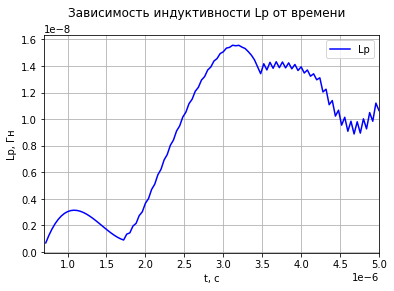

In [14]:
t = np.delete(t, np.s_[:-2:2])
plt.plot(t[(t >= t1) & (t <= t2)], Lp[(t >= t1) & (t <= t2)], color = 'blue', label = 'Lp')
plt.suptitle('Зависимость индуктивности Lp от времени')
plt.xticks(np.linspace(0, 6e-6, 13))
plt.xlim([t1, t2])
plt.xlabel('t, с')
plt.ylabel('Lp, Гн')
plt.legend()
plt.grid()
plt.savefig('Lp(t)')
plt.show()

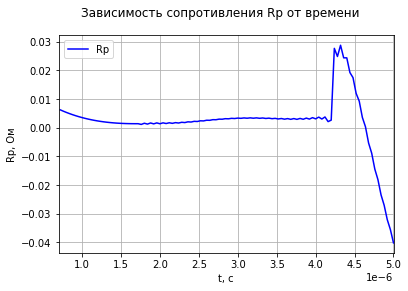

In [15]:
plt.plot(t[(t >= t1) * (t <= t2)], Rp[(t >= t1) * (t <= t2)], color = 'blue', label = 'Rp')
plt.suptitle('Зависимость сопротивления Rp от времени')
plt.xticks(np.linspace(0, 6e-6, 13))

plt.xlim([t1, t2])
plt.xlabel('t, с')
plt.ylabel('Rp, Ом')
plt.legend()
plt.grid()
plt.savefig('Rp(t)')
plt.show()

In [16]:
d = np.array([]) # диаметр столба в м
for i in Lp[t <= t2]:
    d = np.append(d, 74e-3 * math.exp(-i/(2 * 4 * math.pi * 1e-7 * 230e-3)))

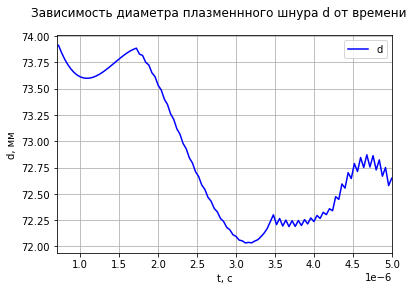

In [17]:
plt.plot(t[0:d.size], d * 1000, color = 'blue', label = 'd')
plt.suptitle('Зависимость диаметра плазменнного шнура d от времени')
plt.xticks(np.linspace(0, 6e-6, 13))
plt.xlim([t1, t2])
plt.xlabel('t, с')
plt.ylabel('d, мм')
plt.legend()
plt.grid()
plt.savefig('d(t)')
plt.show()

In [18]:
t_p_f = np.amax((d == np.amin(d)) * t[t <= t2]) # ТОЧКА ОСОБЕННОСТИ
M = (t_p_f**4 * dI[0]**2) / (1.5**4 * (d[0] * 3e8 / 2)**2) # масса, вовлеченная в сжатие в кг/м
po = np.amax(Rp[(t == t_p_f)] * math.pi * np.amin(d)**2 / 230e-3) # удельное сопротивление в момент особенности Ом * м
T = (6.53e3 * 10 / (100 * po))**(2/3) # температура плазмы по формуле Спитцера в К, кулоновский логарифм равен 10
print('Точка особенности: ', t_p_f, ' с')
print('Диаметр плазменного шнура в точке особенности: ', np.amin(d) * 1000, ' мм')
print('Масса в сжатии: ', M, ' кг/м')
print('Удельное сопротивление в момент особенности: ', 100 * po, ' Ом * cм')
print('Температура плазмы: ', T, ' К')

Точка особенности:  3.12e-06  с
Диаметр плазменного шнура в точке особенности:  72.03395628009291  мм
Масса в сжатии:  1.8934712985333528e-13  кг/м
Удельное сопротивление в момент особенности:  0.023573281256502578  Ом * cм
Температура плазмы:  19724.019759688923  К


In [19]:
dI[0]/1e12

1.1150871873004768

In [20]:
d[0]/2

0.036955993126456255